# Industry Stock Prices

> Comparing average returns on stocks across industries.

In this assignment, we conduct a descriptive analysis of the returns on stocks across industries of S&P 500 companies. To conduct the analysis, we used a dataset from kaggle.com containing information on the S&P 500 companies and their industries. The dataset also contains sub-industries of the companies but we will focus on the main industries (e.g. Health Care, Information Technology, etc.). Additionally, we downloaded data for the stock prices in the year 2023 using Yahoo finance. 

Yfinance has to be installed to run this notebook.  

Imports and set magics:

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime

# Autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# Install yfinance
#pip install yfinance
import yfinance as yf

# user written modules
import dataproject as dp

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Reading and cleaning data

Import a CSV file that contains S&P 500 companies and their industries.

In [13]:
# Read file, sort values in alphabetical order and reset index
SP500 = (pd.read_csv('sp500-companies.csv', encoding='ISO-8859-1')
         .sort_values(by=['Ticker'],ascending=True)
         .reset_index(drop=True))

# Drop columns we don't need
drop_columns = ['Sub-Industry', 'Headquarters Location', 'Date added', 'Founded']
SP500.drop(drop_columns, axis=1, inplace=True)

# Remove duplicates
SP500.index.duplicated(keep='first')

# Display dataframe
SP500.head()

,Ticker,Name,Industry
0,A,Agilent Technologies,Health Care
1,AAL,American Airlines Group,Industrials
2,AAP,Advance Auto Parts,Consumer Discretionary
3,AAPL,Apple Inc.,Information Technology
4,ABBV,AbbVie,Health Care


Create a list of yfinance tickers to pass as input to yfinance.

In [14]:
# Create a list of yfinance tickers 
SP500_tickers = list(SP500['Ticker'])

Download data for 2023 from Yahoo finance and extract adjusted close prices. The adjusted close price is the closing price after adjustments for all applicable splits and dividend distributions.

In [15]:
# Download historical market data for the year 2023
hist_prices = yf.download(tickers = SP500_tickers, start = '2023-01-01',
                        end = '2023-12-31',
                        interval = '1mo')

# Get adjusted close for each stock and change dates
hist_prices = hist_prices['Adj Close']

# Change dateformat
hist_prices.index = pd.to_datetime(hist_prices.index, format='%m-%y')

# Display DataFrame
hist_prices.head()

[*********************100%%**********************]  503 of 503 completed

10 Failed downloads:
['CDAY', 'ATVI', 'PKI', 'PEAK', 'RE', 'FRC', 'ABC', 'BRK.B', 'DISH']: Exception('%ticker%: No timezone found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1mo 2023-01-01 -> 2023-12-31)')


Ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-01,150.738098,16.139999,148.047409,143.305099,139.367401,NaN,107.328476,64.349998,272.630829,370.339996,...,102.589592,65.787476,111.146980,36.091805,102.376038,127.461823,126.122307,316.179993,50.097923,163.157745
2023-02-01,140.717300,15.980000,140.930893,146.403824,146.548477,NaN,99.202927,70.000000,260.502594,323.950012,...,107.271652,61.769623,105.302696,37.306950,101.037407,124.190079,122.685493,300.250000,47.704224,165.033325
2023-03-01,137.119324,14.750000,118.229881,164.024460,151.757172,NaN,98.754311,67.870003,280.377472,385.369995,...,110.775780,64.515144,105.871613,38.492699,103.373146,129.588943,127.964516,318.000000,28.427032,164.479919
2023-04-01,134.235001,13.640000,122.040916,168.779099,143.901260,NaN,107.736404,75.070000,274.962433,377.559998,...,113.121750,67.414871,114.251747,41.242661,102.524048,137.928619,137.377823,288.029999,26.460978,173.709930
2023-05-01,114.836128,14.780000,71.751030,176.308914,132.578415,NaN,99.973129,69.699997,301.283752,417.790009,...,97.699661,62.959763,98.650032,35.527893,98.930176,126.262878,126.362999,262.570007,25.919601,161.436279


Clean the data by removing empty columns.

In [5]:
# Remove columns with NaN values
hist_prices_clean = hist_prices.dropna(axis=1)

To 

In [6]:
# Calculate monthly and cumulative returns 
monthly_returns, cumulative_returns = dp.calculate_returns(hist_prices_clean)

# Set the first row of the cumulative returns to 1
cumulative_returns.iloc[0] = 1

# Display DataFrame
cumulative_returns.head()


Ticker,A,AAL,AAP,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2023-02-01,0.933522,0.990087,0.951931,1.021623,1.051526,0.924293,1.087801,0.955514,0.874737,1.069983,...,1.045639,0.938927,0.947418,1.033668,0.986924,0.974331,0.972750,0.949617,0.952220,1.011496
2023-03-01,0.909653,0.913879,0.798595,1.144582,1.088900,0.920113,1.054701,1.028415,1.040584,1.155525,...,1.079795,0.980660,0.952537,1.066522,1.009740,1.016688,1.014607,1.005756,0.567429,1.008104
2023-04-01,0.890518,0.845105,0.824337,1.177761,1.032532,1.003801,1.166589,1.008552,1.019496,1.053929,...,1.102663,1.024737,1.027934,1.142715,1.001446,1.082117,1.089243,0.910968,0.528185,1.064675
2023-05-01,0.761826,0.915737,0.484649,1.230305,0.951287,0.931469,1.083139,1.105098,1.128126,1.041097,...,0.952335,0.957017,0.887564,0.984376,0.966341,0.990593,1.001908,0.830445,0.517379,0.989449


Create a dictionary of the companies sorted according to their industries.

In [7]:
# Group companies by sector
grouped_companies = {}
for index, row in SP500.iterrows():
    if row['Industry'] in grouped_companies:
        grouped_companies[row['Industry']].append(row['Ticker'])
    else:
        grouped_companies[row['Industry']] = [row['Ticker']]

print(grouped_companies)    

{'Health Care': ['A', 'ABBV', 'ABC', 'ABT', 'ALGN', 'AMGN', 'BAX', 'BDX', 'BIIB', 'BIO', 'BMY', 'BSX', 'CAH', 'CI', 'CNC', 'COO', 'CRL', 'CTLT', 'CVS', 'DGX', 'DHR', 'DVA', 'DXCM', 'ELV', 'EW', 'GEHC', 'GILD', 'HCA', 'HOLX', 'HSIC', 'HUM', 'IDXX', 'ILMN', 'INCY', 'IQV', 'ISRG', 'JNJ', 'LH', 'LLY', 'MCK', 'MDT', 'MOH', 'MRK', 'MRNA', 'MTD', 'OGN', 'PFE', 'PKI', 'PODD', 'REGN', 'RMD', 'STE', 'SYK', 'TECH', 'TFX', 'TMO', 'UHS', 'UNH', 'VRTX', 'VTRS', 'WAT', 'WST', 'XRAY', 'ZBH', 'ZTS'], 'Industrials': ['AAL', 'ALK', 'ALLE', 'AME', 'AOS', 'BA', 'CARR', 'CAT', 'CHRW', 'CMI', 'CPRT', 'CSGP', 'CSX', 'CTAS', 'DAL', 'DE', 'DOV', 'EFX', 'EMR', 'ETN', 'EXPD', 'FAST', 'FDX', 'FTV', 'GD', 'GE', 'GNRC', 'GWW', 'HII', 'HON', 'HWM', 'IEX', 'IR', 'ITW', 'J', 'JBHT', 'JCI', 'LDOS', 'LHX', 'LMT', 'LUV', 'MAS', 'MMM', 'NDSN', 'NOC', 'NSC', 'ODFL', 'OTIS', 'PCAR', 'PH', 'PNR', 'PWR', 'RHI', 'ROK', 'ROL', 'RSG', 'RTX', 'SNA', 'SWK', 'TDG', 'TT', 'TXT', 'UAL', 'UNP', 'UPS', 'URI', 'VRSK', 'WAB', 'WM', 'XYL']

## Exploring the dataset

To explore the data, we first visualise the cumulative returns of each stock.

**Interactive plot** :

In [8]:
industries = grouped_companies.keys()
dropdown = widgets.Dropdown(options = industries, description='Industry:')

def plot_cumulative_returns(cumulative_returns):
    fig = go.Figure()
    for column in cumulative_returns.columns:
        fig.add_trace(go.Scatter(x=cumulative_returns.index, y=cumulative_returns[column], mode='lines', name=column))

    fig.update_layout(title='Cumulative Returns of S&P 500 Companies',
                      xaxis_title='Date',
                      yaxis_title='Cumulative Returns',
                      hovermode='x unified')
    fig.show()

widgets.interact(plot_cumulative_returns, cumulative_returns = widgets.fixed(cumulative_returns), stock = SP500_tickers,
                # Set reference
                ref = widgets.fixed('^OMXC25'),
                # Set figure no.
                fig = widgets.fixed(1),
                # ax_data are only for non-interactive plots
                ax_data=widgets.fixed(None))

interactive(children=(Output(),), _dom_classes=('widget-interact',))

<function __main__.plot_cumulative_returns(cumulative_returns)>

Next, we can visually compare the cumulative returns of 2 different companies.

In [9]:
industries = grouped_companies.keys()
dropdown = widgets.Dropdown(options = SP500_tickers, description='Industry:')

# Function to plot a line graph of cumulative returns for each stock
def plot_cumulative_returns(cumulative_returns, selected_companies):
    fig = go.Figure()
    for company in selected_companies:
        fig.add_trace(go.Scatter(x=cumulative_returns.index, y=cumulative_returns[company], mode='lines', name=company))

    fig.update_layout(title='Cumulative Returns of Selected S&P 500 Companies',
                      xaxis_title='Date',
                      yaxis_title='Cumulative Returns',
                      hovermode='x unified')
    fig.show()

# List of available companies (assuming cumulative_returns.columns contains company names)
companies = cumulative_returns.columns.tolist()

# Create multi-select dropdown widget for selecting multiple companies
company_dropdown = widgets.SelectMultiple(options=companies, value=[companies[0]], description='Select Companies')

# Create interactive widget using widgets.interact
widgets.interact(plot_cumulative_returns, cumulative_returns=widgets.fixed(cumulative_returns), selected_companies=company_dropdown)

interactive(children=(SelectMultiple(description='Select Companies', index=(0,), options=('A', 'AAL', 'AAP', '…

<function __main__.plot_cumulative_returns(cumulative_returns, selected_companies)>

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Merge the data on cumulative returns and the data from the SP500 dataframe. 

In [10]:
merged_data = pd.merge(hist_prices_clean.transpose(), SP500, on='Ticker')
merged_data.head()

,Ticker,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,Name,Industry
0,A,150.738098,140.717316,137.119339,134.234985,114.836136,119.383125,121.123016,120.426743,111.225891,102.820786,127.377281,138.570129,Agilent Technologies,Health Care
1,AAL,16.139999,15.980000,14.750000,13.640000,14.780000,17.940001,16.750000,14.730000,12.810000,11.150000,12.430000,13.740000,American Airlines Group,Industrials
2,AAP,148.047424,140.930878,118.229881,122.040924,71.751022,69.201500,73.227577,67.984848,55.251270,51.398602,50.419548,60.584858,Advance Auto Parts,Consumer Discretionary
3,AAPL,143.305099,146.403809,164.024475,168.779114,176.308914,193.207016,195.677261,187.130997,170.766846,170.327972,189.458313,192.284637,Apple Inc.,Information Technology
4,ABBV,139.367401,146.548447,151.757156,143.901276,132.578430,129.474411,143.745148,142.793015,144.833450,137.176880,139.737427,152.083069,AbbVie,Health Care


# Analysis

In [11]:
# window_size = 30
# merged_data['30_day_MA'] = merged_data[]

grouped_returns = merged_data.groupby('Industry')
# print(grouped_returns.head())
# average_returns = grouped_returns['Return'].mean()

print(grouped_returns.describe())

#plt.figure(figsize=(10, 6))
##plt.plot(merged_data['Return'])
#plt.title('Time Series of Daily Returns')
#plt.xlabel('Return')
#plt.ylabel('Frequency')
#plt.grid(True)
#plt.show()

                       2023-01-01 00:00:00                                     \
                                     count        mean         std        min   
Industry                                                                        
Communication Services                23.0   90.228628   98.747641   5.250000   
Consumer Discretionary                56.0  338.264744  829.396995  10.820000   
Consumer Staples                      33.0  102.470594   92.041742  33.956879   
Energy                                23.0   83.780112   53.940542  16.609694   
Financials                            62.0  138.348340  134.884943  14.192809   
Health Care                           63.0  227.538929  226.404076  11.480914   
Industrials                           70.0  165.720936  134.762133  16.139999   
Information Technology                74.0  186.131848  132.427937  15.527388   
Materials                             29.0  128.160843   93.533540  11.321113   
Real Estate                 

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

Showing the summary statistics in a grapgh with chosen sectors

                       2023-01-01 00:00:00                                     \
                                     count        mean         std        min   
Industry                                                                        
Communication Services                23.0   90.228628   98.747641   5.250000   
Consumer Discretionary                56.0  338.264744  829.396995  10.820000   
Consumer Staples                      33.0  102.470594   92.041742  33.956879   
Energy                                23.0   83.780112   53.940542  16.609694   
Financials                            62.0  138.348340  134.884943  14.192809   
Health Care                           63.0  227.538929  226.404076  11.480914   
Industrials                           70.0  165.720936  134.762133  16.139999   
Information Technology                74.0  186.131848  132.427937  15.527388   
Materials                             29.0  128.160843   93.533540  11.321113   
Real Estate                 

/var/folders/5k/42cjjb390fsb3629y6pmdcwr0000gn/T/ipykernel_838/2816308688.py:14: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



<Figure size 500x600 with 0 Axes>

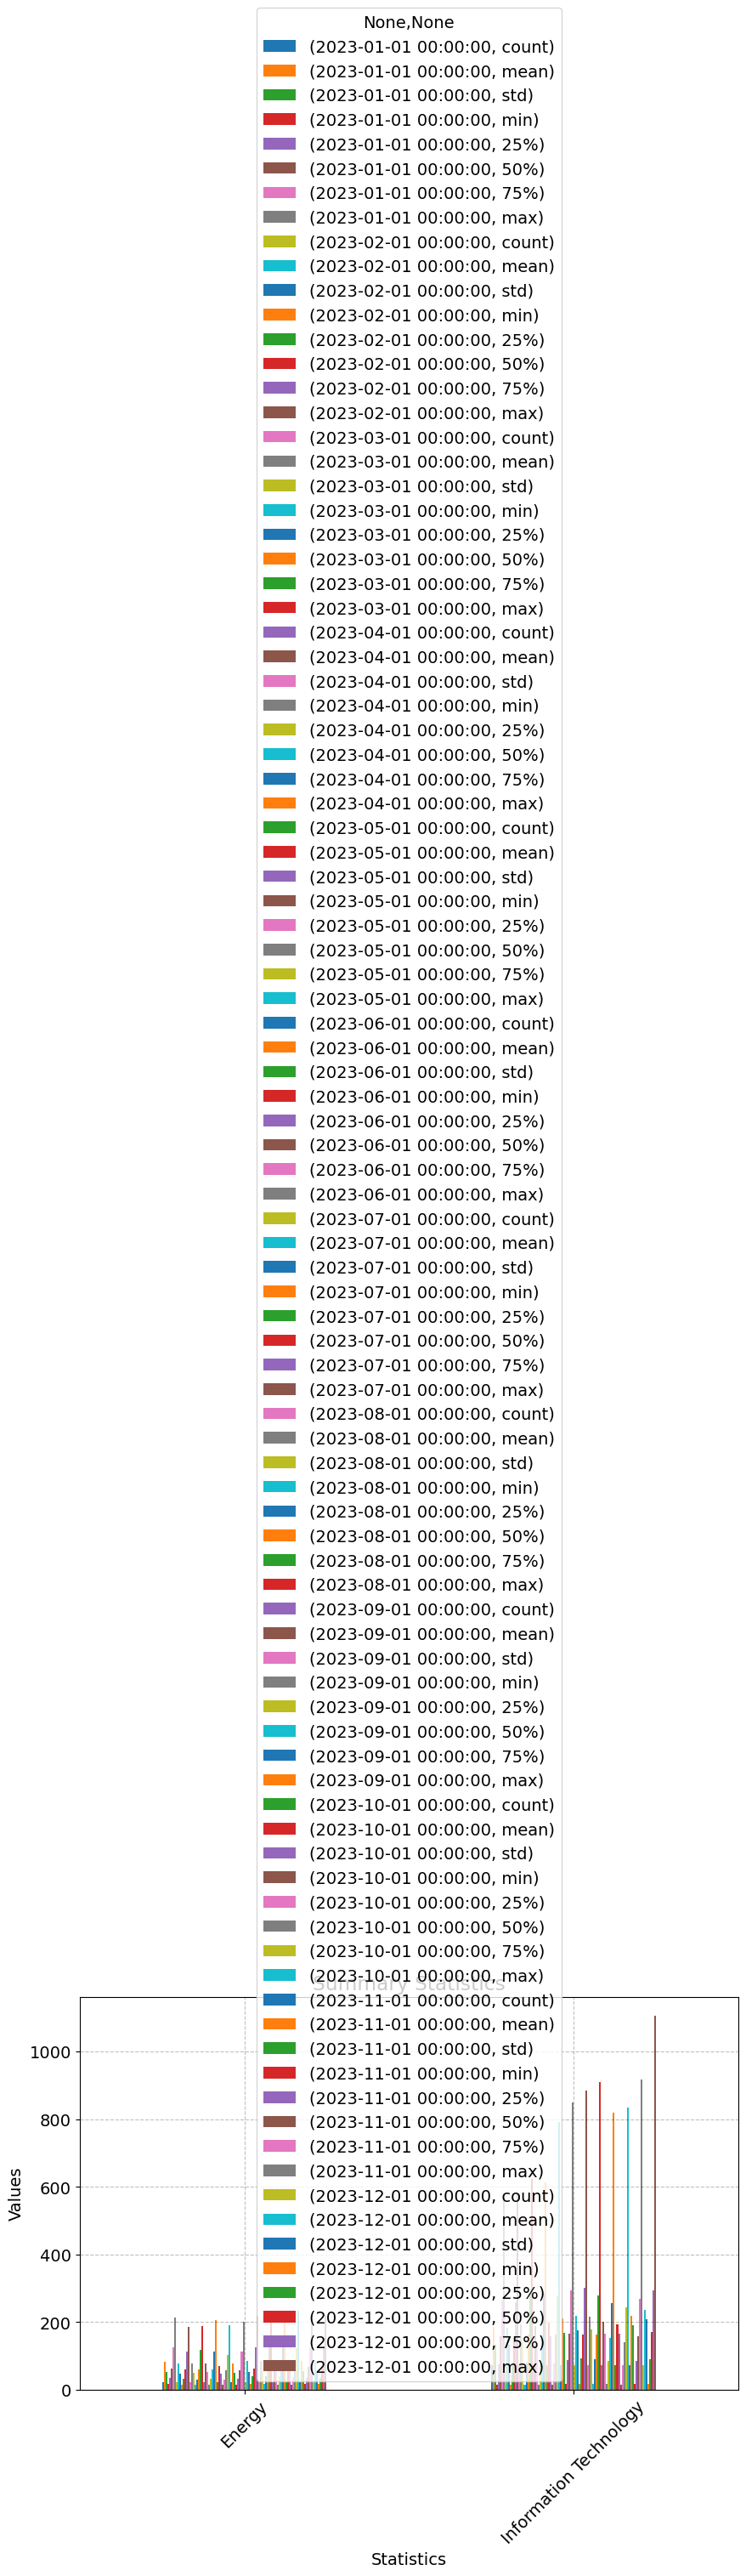

In [33]:

print(grouped_returns.describe())

# Here we chose Energy and Information Technology
summary_stats = grouped_returns.describe().iloc[[3, 7], :] 


plt.figure(figsize=(5, 6))
summary_stats.plot(kind='bar', figsize=(10, 6))
plt.title('Summary Statistics')
plt.ylabel('Values')
plt.xlabel('Statistics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Conclusion

By importing and cleaning data we get to analyze the chosen data in a specific way. It's possible for us to chose whatever sector needed and provide graphic and nummerical statistics. 